# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('D:/learn_data/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
median_income = data.groupby('income_type')['total_income'].transform('median')
data['total_income'] = data['total_income'].fillna(median_income)
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [6]:
#for t in data['income_type'].unique():
#    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
#    data.loc[(data['income_type'] == t), 'total_income'].median()

In [7]:
data['total_income'] = data['total_income'].mask(data['total_income'].isna(), data.groupby('total_income')['total_income'].transform('median'))
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

<a id=intro></a>

### Шаг 3. Исследуйте данные и ответьте на вопросы

Для дальнейшего исследования необходимо оптмизировать структуру отображения данных в датафрейме. С этой целью перенесем информацию из колонок об образовании и семейном положении из основного датафрейма в отдельные вспомогательные таблицы данных. 

In [24]:
df_education_dict = data[['education_id', 'education']]
df_family_status_dict = data[['family_status_id', 'family_status']]
df = data.drop(columns=['education', 'family_status'])
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Проверим сведения во вспомогательном датафрейме `df_education_dict`, где, в случае отсутствия аномалий, удалим дубликаты и обновим индексы.

In [25]:
df_education_dict.value_counts()

education_id  education          
1             среднее                15075
0             высшее                  5227
2             неоконченное высшее      741
3             начальное                282
4             ученая степень             6
dtype: int64

In [26]:
df_education_dict = df_education_dict.drop_duplicates().reset_index(drop=True)
df_education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Аналогичные действия проведем со вспомогательным датафреймом `df_family_status_dict`.

In [27]:
df_family_status_dict.value_counts()

family_status_id  family_status        
0                 женат / замужем          12261
1                 гражданский брак          4134
4                 Не женат / не замужем     2796
3                 в разводе                 1189
2                 вдовец / вдова             951
dtype: int64

In [28]:
df_family_status_dict = df_family_status_dict.drop_duplicates().reset_index(drop=True)
df_family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


В дальнейшем для наглядной демонстрации результатов анализа полагаем необходимым воспользоваться графиками, в связи с чем требуется импортировать билиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

Затем приступим к дальнейшему анализу имеющихся данных.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для начала определим долю "проблемных" клиентов от их общего количества, для чего предварительно объявим функцию `'debt_share'`, которую будем также использовать в дальнейшем.   

In [30]:
def debt_share(total_count, debt_count):
    return debt_count / total_count

In [31]:
total_client = data['debt'].size
total_debt_client = data['debt'].value_counts()[1]
total_debt_client_share = debt_share(total_client, total_debt_client)
print(f'Общая доля "проблемных" клиентов (с учетом сокращения до 4 знака после запятой) \
составляет {total_debt_client_share:.4f} или {total_debt_client_share:.2%}')

Общая доля "проблемных" клиентов (с учетом сокращения до 4 знака после запятой) составляет 0.0812 или 8.12%


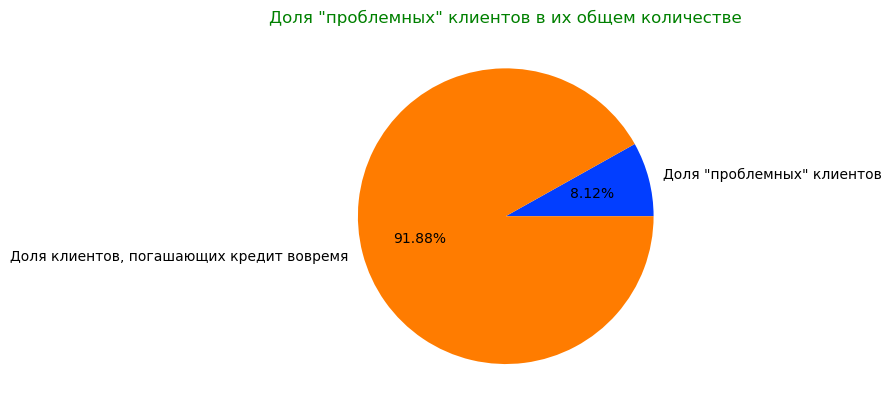

In [32]:
total_debt_client_share_for_diagramme = [total_debt_client_share, 1 - total_debt_client_share]
name_for_diagramme = ['Доля "проблемных" клиентов', 'Доля клиентов, погашающих кредит вовремя']
colors = sns.color_palette('bright')[0:2]
plt.title('Доля "проблемных" клиентов в их общем количестве', c='green')
plt.pie(total_debt_client_share_for_diagramme, labels=name_for_diagramme, colors=colors, autopct='%.2f%%');

*Гипотеза: Количество детей у клиента влияет на возврат кредита в срок.*
Теперь приступим непосредственно к рассмотрению гипотезы о том, что есть некоторая зависимость между количеством детей у клиента и фактом возврата им кредита в положенный срок.

In [33]:
pivot_by_children = data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_children['mean, %'] = pivot_by_children['mean'] * 100
pivot_by_children

,children,count,sum,mean,"mean, %"
0,0,14091,1063,0.075438,7.543822
1,1,4808,444,0.092346,9.234609
2,2,2052,194,0.094542,9.454191
3,3,330,27,0.081818,8.181818
4,4,41,4,0.097561,9.756098
5,5,9,0,0.000000,0.000000


Как видно из полученных в ходе анализа сведений о доле "проблемных" клиентов с учетом количества детей, приходим к выводу о росте доли таких клиентов с ростом количества имещихся у них детей (данные о клиентах с 3-мя, 4-мя и 5-ю детьми в расчет не принимались по причине малого количества сведений), при этом средняя доля "проблемных" клиентов без детей ниже средней доли таких лиц в целом, и существенно ниже доли "проблемных" клиентов среди лиц с детьми. Для визуализации вывода ниже приведена гистограмма.

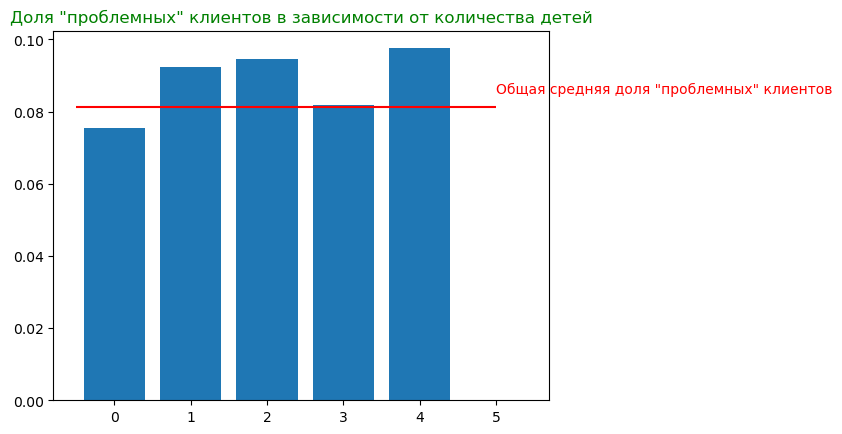

In [34]:
# первоначальный вариант sns.barplot(x=df['children'].sort_values().unique(), y=debt_share_by_children)
plt.bar(x=df['children'].sort_values().unique(), height=pivot_by_children['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=5, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от количества детей', c='green')
plt.text(x=5, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.show;

**Вывод:** Гипотеза о наличии зависимости между количеством детей и возвратом кредита в срок в целом подтверждена. Люди, которые не имеют детей, лучше всего отдают кредит, доля должников здесь составляет с **7,5%**, что ниже среднего их количества в целом. Хуже обстоит дело с кредиторами, которые имеют одного или двух детей, здесь доля невозврата составляет соответственно **9,2%** и **9,4%**. Остальные категории уже некорректно сравнивать, так как в них очень маленькая выборка.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

*Гипотеза: Семейное положение клиента влияет на возврат кредита в срок.* 

Перед дальнейшей работой проверим сведения в интересующи стобцах на отсутствие аномалий. 

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
display(df_family_status_dict)
df['family_status_id'].value_counts()

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


0    12261
1     4134
4     2796
3     1189
2      951
Name: family_status_id, dtype: int64

Таким образом, в имеющемся датафрейме предложено 5 вариантов статуса семейного положения, каждый из которых имеет достаточо сведений о клиентах своей категории для формирования вывода о гипотезе. Далее осуществим расчет доли числа "проблемных" клиентов в зависимости от семейного положения.

In [36]:
pivot_by_family = data.pivot_table(index=['family_status'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_family['mean, %'] = pivot_by_family['mean'] * 100
pivot_by_family

,family_status,count,sum,mean,"mean, %"
0,Не женат / не замужем,2796,273,0.097639,9.763948
1,в разводе,1189,84,0.070648,7.064760
2,вдовец / вдова,951,63,0.066246,6.624606
3,гражданский брак,4134,385,0.093130,9.313014
4,женат / замужем,12261,927,0.075606,7.560558


Как видно из проведенного анализа гипотеза о наличии зависимости между семейным положением клиента и возвратом им кредита в срок нашла свое подтверждение. Так установлено, что риск непогашения кредита в установленный срок минимален у `вдовцов(вдов)`, в то время как у `неженатых (незамужних)` клиентов он существенно превышает общий средний показатель. Для визуализации сведений, на основе которых был сделан вывод, ниже приведена гистограмма.

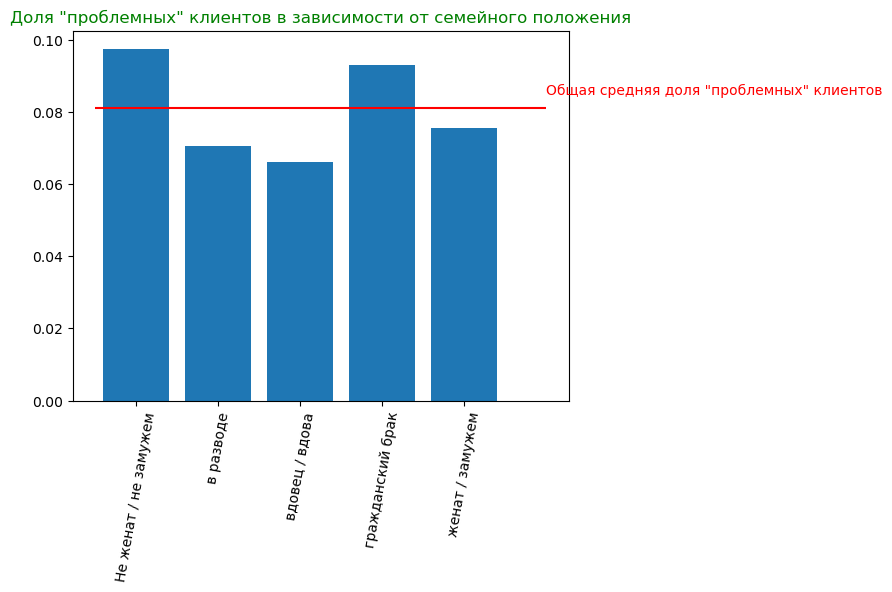

In [37]:
# первоначальный вариант sns.barplot(x=df_family_status_dict['family_status'].unique(), y=debt_share_by_family)
plt.bar(x=pivot_by_family['family_status'].unique(), height=pivot_by_family['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=5, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от семейного положения', c='green')
plt.text(x=5, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=80)
plt.show;

**Вывод:** Гипотеза о наличии зависимости между семейным положением клиента и возвратом им кредита в срок полностью нашла свое подтверждение. Так установлено, что риск непогашения кредита в установленный срок минимален у `вдовцов(вдов)` - **6,62%**, также ниже среднего (показатель **8,12%**) у лиц `в разводе` - **7,06%** и `женатых/замужних` - **7,56%**, в то время как у `неженатых/незамужних` и лиц, находящихся `в гражданском браке`,  он существенно превышает средний показатель и составляет **9,76%** и **9,31%** соответственно.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

*Гипотеза: Уровень дохода клиента влияет на возврат кредита в срок.*

Перед дальнейшей работой проверим сведения в интересующих стобцах на отсутствие аномалий и достаточности выборки. 

In [38]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_by_income = df.groupby('total_income_category')['total_income_category'].count()
count_by_income

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64

Исходя из полученных сведений приходим к выводу о возможности проведения анализа данных с целью установления наличия корреляции между уровнем дохода клиента (данные столбца `'total_income_cateroty'`) и его способостью своевременно погашать кредит (данные из столбца `'debt'`). Получим сведения о количестве "проблемных" клиентов с разбивкой по категориям уровня дохода. При этом отметим, что число сведений о клиентах с уровнем дохода `менее 30 001`, а также `более 1 000 000` крайне незначительно, в связи с чем можно сделать вывод о том, что сведения по данным категориям клиентов не могут достоверно отражать действительную картину. 

In [39]:
pivot_by_income = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_income['mean, %'] = pivot_by_income['mean'] * 100
pivot_by_income

,total_income_category,count,sum,mean,"mean, %"
0,A,25,2,0.080000,8.000000
1,B,5014,354,0.070602,7.060231
2,C,15921,1353,0.084982,8.498210
3,D,349,21,0.060172,6.017192
4,E,22,2,0.090909,9.090909


Из проведенного анализа следует, что гипотеза о наличии зависимости между уровнем дохода клиента и возвратом им кредита в срок частично нашла свое подтверждение, поскольку приходим к выводу о росте доли "проблемных" клиентов с уменьшением их дохода (учитывались данные о клиентах с доходом от `50 001 до 200 000` и с доходом от `200 001 до 1 000 000`, поскольку сведений о других категориях недостаточно для формулировки подобных выводов). Для визуализации вывода ниже приведена гистограмма.

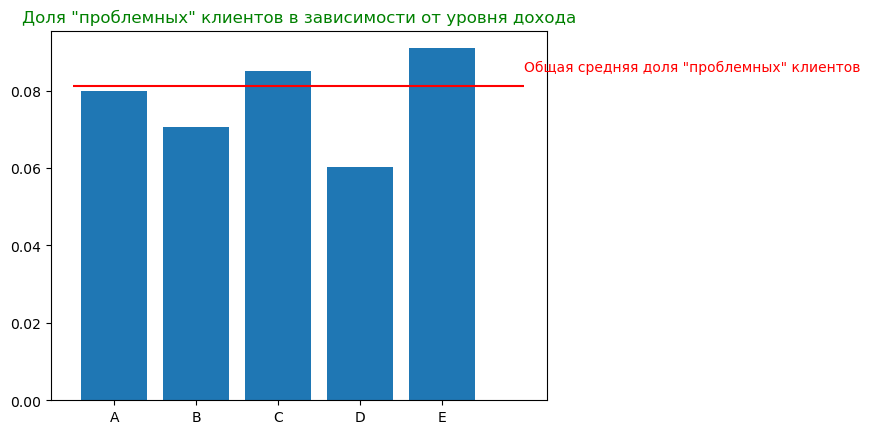

In [40]:
# первоначальный вариант sns.barplot(x=df['total_income_category'].sort_values().unique(), y=debt_share_by_income)
plt.bar(x=pivot_by_income['total_income_category'].sort_values().unique(), height=pivot_by_income['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=5, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от уровня дохода', c='green')
plt.text(x=5, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.show;

**Вывод:** Гипотеза о наличии зависимости между уровнем дохода клиента и возвратом им кредита в срок нашла свое подтверждение. При этом только в группах В и С выборка достаточна для их сравнения. Усановлено, что 
риск непогашения кредита в установленный срок у клиентов с доходом `от 200 001 до 1 000 000 (категория B)` составляет **7,06%**, что существенно ниже среднего(**8,12%**), тогда как у клиентов с доходом `от 50 001 до 200 000 (категория С)` он несколько превышает средний показатель и находится на уровне **8,5%**. Данные о других категориях доходов клиентов `(категории A, D, E)` не учитывались по причине их недостаточного количества для достоверного анализа.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

*Гипотеза: Цель получения кредита влияет на его возврат в срок.*

Перед дальнейшей работой проверим сведения в интересующи стобцах на отсутствие аномалий и достаточности выборки.

In [41]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
count_by_purpose = df.groupby('purpose_category')['purpose_category'].count()
count_by_purpose

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [42]:
pivot_by_purpose = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_purpose['mean, %'] = pivot_by_purpose['mean'] * 100
pivot_by_purpose

,purpose_category,count,sum,mean,"mean, %"
0,операции с автомобилем,4279,400,0.093480,9.347978
1,операции с недвижимостью,10751,780,0.072551,7.255139
2,получение образования,3988,369,0.092528,9.252758
3,проведение свадьбы,2313,183,0.079118,7.911803


Из проведенного анализа следует, что гипотеза о наличии зависимости между целями кредита и возвратом клиентом кредита в срок нашла свое подтверждение, поскольку приходим к выводу о минимальной доле "проблемных" клиентов, получавших кредит для операций с недвижимостью, в то время как получение кредита для операций с автомобилем или получения образования значительно выше среднего повышали риск непогашения кредита в срок. Для визуализации вывода ниже приведена гистограмма.

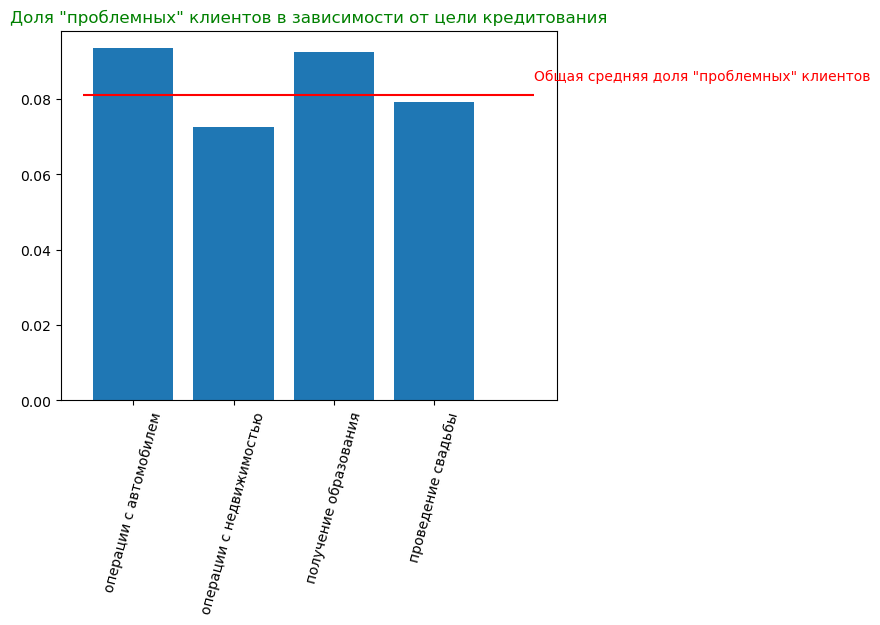

In [43]:
# первоначальный вариант sns.barplot(x=df['purpose_category'].sort_values().unique(), y=debt_share_by_purpose)
plt.bar(x=pivot_by_purpose['purpose_category'].sort_values().unique(), height=pivot_by_purpose['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=4, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от цели кредитования', c='green')
plt.text(x=4, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=75)
plt.show;

**Вывод:** Гипотеза о наличии зависимости между целями кредита и возвратом клиентом кредита в срок нашла свое подтверждение. Доля "проблемных" клиентов, получавших кредит для операций с недвижимостью, является минимальной (всего **7,26%**), что по всей видимости связано с частой практикой заключения договора ипотеки, по которому в залог обращается само невижимое имущество. Доля "проблемных" клиентов, получавших кредит в целях проведения свадьбы, также ниже среднего показателя и составляет **7.91%**. В тоже время получение кредита для операций с автомобилем или получения образования значительно выше среднего повышали риск непогашения кредита в срок и доля "проблемных" клиентов этих категорий составила **9,35%** и **9,25%** соответственно.

<c id=onebar></c>

#### 3.4a Часть исследования, которая не включена непосредственно в полученное задание. 

С учетом наличия во фрейме данных сведений о поле, возасте и образовании клиентов, полагается целесообразным также провести аналогичный анализ на предмет нахождения возможного наличия закономерностей между риском непогашения кредита в срок и полом, возрастом, образованием клиента.
Гипотезы:
1. Возраст кредитора влияет на возврат кредита в срок.
2. Половая принадлежность кредитора влияет на возврат кредита в срок.
3. Образование кредитора влияет на возврат кредита в срок.

Далее будет проведено исследование по аналогии с проведенным ранее, без подробного пояснения по каждому шагу, лишь с приведением к окончанию графика и краткого вывода о подтверждении или опровержении гипотезы.

In [44]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [45]:
count_by_age = df.groupby('dob_years')['dob_years'].count()
count_by_age

dob_years
0     100
19     14
20     51
21    110
22    183
23    250
24    263
25    356
26    406
27    490
28    501
29    542
30    533
31    555
32    505
33    577
34    595
35    613
36    552
37    530
38    594
39    571
40    601
41    601
42    591
43    509
44    541
45    493
46    466
47    477
48    534
49    505
50    508
51    444
52    483
53    457
54    473
55    441
56    478
57    453
58    454
59    440
60    373
61    352
62    347
63    268
64    258
65    193
66    182
67    167
68     99
69     83
70     65
71     56
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

Как видно из вышеуказанных данных в колонке `'dob_years'` имеются неявные пропуски в виде указания возраста в размере 0 лет в 100 случаях, чего в реальности быть не может, поскольку младенцы в возрасте до года в полном объеме не обладают правосубъектностью и не способны получить кредит на своё имя. Подобные пропуски восполнить не представляется возможным, в тоже время их наличие может негативно повлиять на достоверность проводимого анализа, в связи с чем строки с таким пропусками следует удалить. 

In [46]:
df_by_age = df[df['dob_years'] != 0].copy()

C учетом удаления ряда строк с пропусками для расчетов по возрасту необходимо пересчитать среднюю долю "проблемных" клиентов. 

In [47]:
df_by_age['debt'].value_counts()

0    19507
1     1724
Name: debt, dtype: int64

In [48]:
total_client_by_age = df_by_age['debt'].size
total_debt_client_by_age = df_by_age['debt'].value_counts()[1]
total_debt_client_share_by_age = debt_share(total_client_by_age, total_debt_client_by_age)
print(f'Общая доля "проблемных" клиентов для рассчетов по возрасту (с учетом сокращения до 4 знака после запятой) \
составляет {total_debt_client_share_by_age:.4f} или {total_debt_client_share_by_age:.2%}')

Общая доля "проблемных" клиентов для рассчетов по возрасту (с учетом сокращения до 4 знака после запятой) составляет 0.0812 или 8.12%


Как видно из приведенного расчета удаление строк по пропускам в колонке `'dob_years'` практически не повлияло на средний показатель "проблемных" клентов (во всяком случае до 4 знака после запятой). Однако для чистоты проверки гипотезы о влиянии риска невозврата кредита в срок возраста кредитора будем использовать новый показатель. 

Кроме того, показатели сведений о возрасте клиентов свидетельствуют о том, что количество клиентов в возрасте *от 19 до 21 года* и в возрасте *от 68 до 75 лет* незначительно, однако подобная проблема исчезает при осуществлении категоризации данных по возрасту.

In [49]:
def categorize_age(age):
    try:
        value = age
        if age <= 25:
            return 'юность'
        elif  26 <= age <= 35:
            return 'молодость'
        elif 36 <= age <= 54:
            return 'зрелость'
        elif 55 <= age:
            return 'старость'
    except:
        pass

In [50]:
df_by_age['age'] = df_by_age['dob_years'].apply(categorize_age)

In [51]:
pivot_by_age = df_by_age.pivot_table(index=['age'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_age['mean, %'] = pivot_by_age['mean'] * 100
pivot_by_age

,age,count,sum,mean,"mean, %"
0,зрелость,9930,767,0.077241,7.724068
1,молодость,5317,564,0.106075,10.607485
2,старость,4757,262,0.055077,5.507673
3,юность,1227,131,0.106764,10.676447


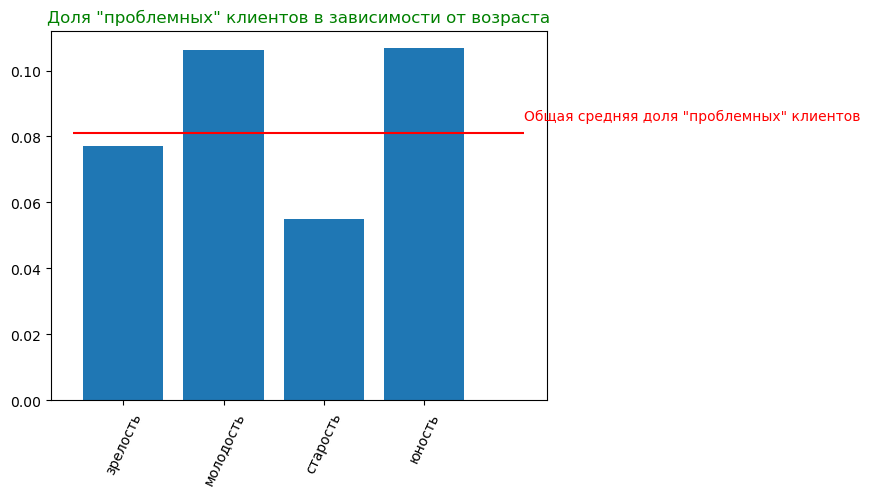

In [52]:
# первоначальный вариант sns.barplot(x=df_by_age['age'].sort_values().unique(), y=debt_share_by_age)
plt.bar(x=pivot_by_age['age'].sort_values().unique(), height=pivot_by_age['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=4, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от возраста', c='green')
plt.text(x=4, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=65)
plt.show;

Выше приведено исследование с учетом условной категоризации по возрасту на `юность, молодость, зрелость и старость`, которая не имеет каких-либо стандартных в реальной жизни границ таких категорий, которые также могут разлчаться по их длительности. Для перепроверки показателей проведем также исследование, проведя категоризацию по возрасту с разделением на равные промежутки в 10 лет (ввиду малого количества юных и пожилых клиентов лица в возрасте до 20 лет будут отнесены к двадцатилетним, а клиенты старше 70 лет к шестидесятилетним).  

In [53]:
def categorize_age2(age2):
    try:
        value = age2
        if age2 < 30:
            return '20 - двадцатилетние'
        elif  30 <= age2 < 40:
            return '30 - тридцатилетние'
        elif 40 <= age2 < 50:
            return '40 - сорокалетние'
        elif 50 <= age2 < 60:
            return '50 - пятидесятилетние'
        elif 60 <= age2:
            return '60 - шестидесятилетние'
    except:
        pass

In [54]:
df_by_age['age2'] = df_by_age['dob_years'].apply(categorize_age2)

In [55]:
pivot_by_age2 = df_by_age.pivot_table(index=['age2'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_age2['mean, %'] = pivot_by_age2['mean'] * 100
pivot_by_age2

,age2,count,sum,mean,"mean, %"
0,20 - двадцатилетние,3166,349,0.110234,11.023373
1,30 - тридцатилетние,5625,548,0.097422,9.742222
2,40 - сорокалетние,5318,401,0.075404,7.540429
3,50 - пятидесятилетние,4631,303,0.065429,6.542863
4,60 - шестидесятилетние,2491,123,0.049378,4.937776


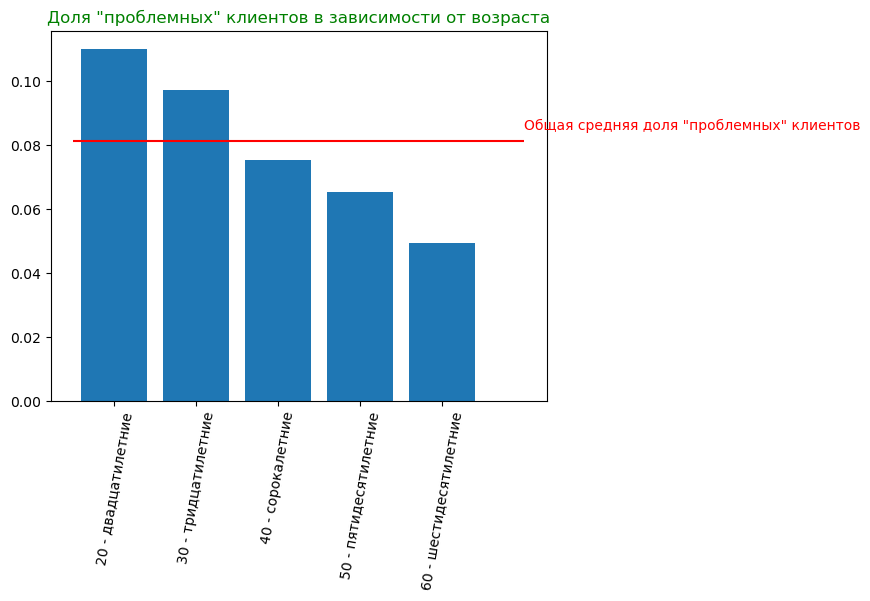

In [56]:
plt.bar(x=pivot_by_age2['age2'].sort_values().unique(), height=pivot_by_age2['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=5, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от возраста', c='green')
plt.text(x=5, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=80)
plt.show;

Как видно из проведенного исседования риск невозвращения кредита в срок снижается с увеличением возраста клиента. 

**Вывод:** Гипотеза о наличии закономерности между возрастом и риском получения "проблемного" клиента полностью подтверждена. В ходе проведенного анализа установлено, что чем моложе клиент, тем более высока вероятность непогащения кредита в срок. Данная вероятность уверенно снижается с увеличением возраста клиента.

In [57]:
count_by_gender = df.groupby('gender')['gender'].count()
count_by_gender

gender
F      14092
M       7238
XNA        1
Name: gender, dtype: int64

Из данных в колонке `'gender'` следует, что около 2/3 клиентов являются женщинами (female), 1/3 клиентов мужчины (male), а также имеется сведения об одном клиенте, у которого в графе пол указано непонятное значение `XNA`, что несомненно указывает на пропуск соотвествующих данных и либо является явной ошибкой, либо от заказчика не предоставлено достаточных сведений, согласно которым можно определить пол указанного клиента. Подобный пропуск восполнить не представляется возможным, в целях чистоты проводимого анализа данную строку следует удалить и пересчитать значение среднего показателя риска появления "проблемного" клиента. 

In [58]:
df_by_gender = df[df['gender'] != 'XNA'].copy()

In [59]:
total_client_by_gender = df_by_gender['debt'].size
total_debt_client_by_gender = df_by_gender['debt'].value_counts()[1]
total_debt_client_share_by_gender = debt_share(total_client_by_gender, total_debt_client_by_gender)
print(f'Общая доля "проблемных" клиентов для рассчетов по половой принадлежности (с учетом сокращения до 4 знака после \
запятой) составляет {total_debt_client_share_by_gender:.4f} или {total_debt_client_share_by_gender:.2%}')

Общая доля "проблемных" клиентов для рассчетов по половой принадлежности (с учетом сокращения до 4 знака после запятой) составляет 0.0812 или 8.12%


In [60]:
pivot_by_gender = df_by_gender.pivot_table(index=['gender'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_gender['mean, %'] = pivot_by_gender['mean'] * 100
pivot_by_gender

,gender,count,sum,mean,"mean, %"
0,F,14092,989,0.070182,7.018166
1,M,7238,743,0.102653,10.265267


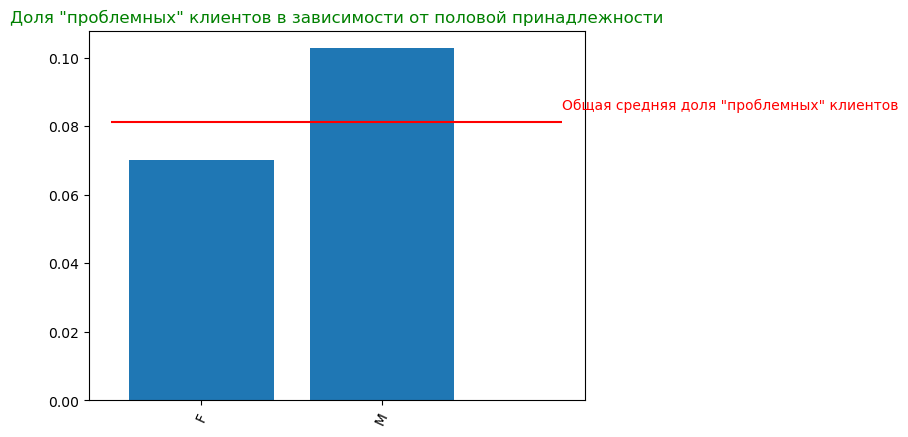

In [61]:
# первоначальный вариант sns.barplot(x=df_by_gender['gender'].sort_values().unique(), y=debt_share_by_gender)
plt.bar(x=pivot_by_gender['gender'].sort_values().unique(), height=pivot_by_gender['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=2, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от половой принадлежности', c='green')
plt.text(x=2, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=65)
plt.show;

**Вывод:** Гипотеза о наличии закономерности между половой принадлежностью клиента и риском получения "проблемного" клиента полностью подтверждена. В ходе проведенного анализа установлено, что мужчины существенно чаще женщин не взвращают кредит в срок.

In [62]:
df['education_id'].value_counts()

1    15075
0     5227
2      741
3      282
4        6
Name: education_id, dtype: int64

In [63]:
pivot_by_education = df.pivot_table(index=['education_id'], values='debt', aggfunc=['count', 'sum', 'mean']).reset_index().droplevel(1, axis=1)
pivot_by_education['mean, %'] = pivot_by_education['mean'] * 100
pivot_by_education

,education_id,count,sum,mean,"mean, %"
0,0,5227,278,0.053185,5.318538
1,1,15075,1355,0.089884,8.988391
2,2,741,68,0.091768,9.176788
3,3,282,31,0.109929,10.992908
4,4,6,0,0.000000,0.000000


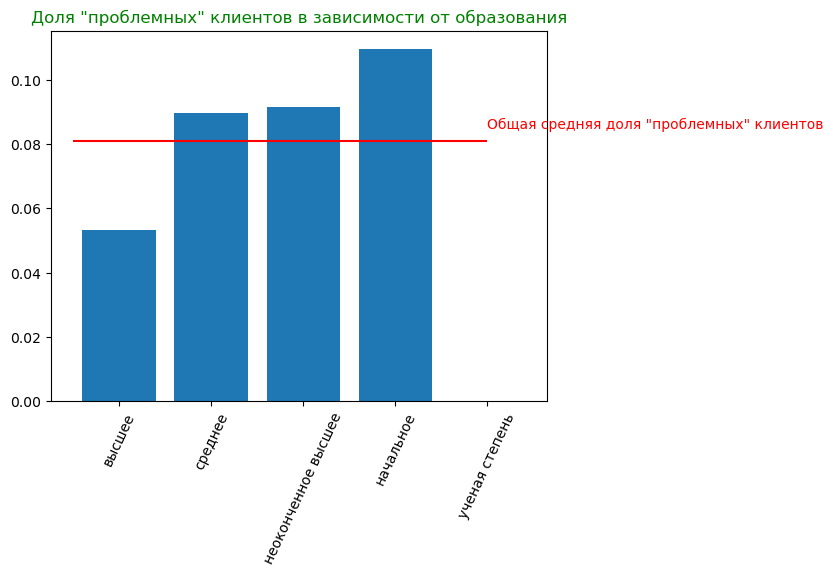

In [64]:
# первоначальный вариант sns.barplot(x=df_education_dict['education'].unique(), y=debt_share_by_education)
plt.bar(x=df_education_dict['education'].unique(), height=pivot_by_education['mean'])
plt.hlines(y=total_debt_client_share, xmin=-0.5, xmax=4, colors='red')
plt.title('Доля "проблемных" клиентов в зависимости от образования', c='green')
plt.text(x=4, y=0.085, s='Общая средняя доля "проблемных" клиентов', c='red')
plt.xticks(rotation=65)
plt.show;

**Вывод:** Гипотеза о наличии закономерности между уровнем образования клиента и риском невозвращеия им кредита в срок подтверждена частично. В ходе проведенного анализа установлено, что риск получения "проблемного" клиента из лица с высшим образованием существенно ниже среднего показателя. В то же время разница значений подобных показателей среди клиентов со средним образованием и неоконченным высшим незначительна, а данные о клиентах с начальным образованием и с ученой степенью нельзя учитывать при проведении данного анализа ввиду незначительного количества сведений по ним.

В это же время следует отметить, что закономерности в определении доли "проблемных" клиентов от их общей массы зависят не от какого-либо одного показателя, а от их комплекса, поскольку между такими различными показателями могут существовать определенные корелляции сами по себе. Так, например, будет логичным предположить связь возраста и уровня дохода клиента, поскольку логично будет предполагать, что с повышением опыта человека будет расти и его заработная плата. Также несомненно можно прийти к выводу о том,  что между собой тесно связаны возраст и образование клиента, так как с возрастом естественно растет возможность того, что клиент к данному возрасту получит образование более высокого уровня, чем когда он был моложе. Для подтверждения этого проведем исследование, направленное на определение доли "проблемных" клиентов одновременно учитывая возраст и уровень дохода лица.

In [65]:
dependance_age_education = df_by_age.pivot_table(index=['age'], columns='total_income_category', values='debt', aggfunc=['count', 'sum', 'mean'])
dependance_age_education

count                               sum                \
total_income_category     A       B       C      D     E    A      B      C   
age                                                                           
зрелость               17.0  2562.0  7212.0  132.0   7.0  2.0  177.0  580.0   
молодость               4.0  1367.0  3886.0   59.0   1.0  0.0  117.0  442.0   
старость                4.0   871.0  3719.0  149.0  14.0  0.0   43.0  209.0   
юность                  NaN   188.0  1032.0    7.0   NaN  NaN   16.0  115.0   

                                     mean                                \
total_income_category    D    E         A         B         C         D   
age                                                                       
зрелость               8.0  0.0  0.117647  0.069087  0.080422  0.060606   
молодость              5.0  0.0  0.000000  0.085589  0.113742  0.084746   
старость               8.0  2.0  0.000000  0.049369  0.056198  0.053691   
юность                 0.0  NaN       NaN  0.085106  0.111434  0.000000   

                                 
total_income_category         E  
age                              
зрелость               0.000000  
молодость              0.000000  
старость               0.142857  
юность                      NaN

При рассмотрении данных сводной таблицы будем обращать внимание только на столбцы `'B'` и `'C'`, поскольку сведения в остальных столбцах недостатчны для статистического анализа. Как видно имеются значительные различия в результатах как с учетом их сравнения по строкам, так и по столбцам, что свидетельствует о влиянии обоих показателей. Далее посмотрим какова будет картина, если учитывать возраст и образование клиента. 

In [66]:
dependance_age_income = df_by_age.pivot_table(index=['age'], columns='education_id', values='debt', aggfunc=['count', 'sum', 'mean'])
dependance_age_income

count                               sum                     \
education_id       0       1      2      3    4      0      1     2     3   
age                                                                         
зрелость      2310.0  7281.0  227.0  109.0  3.0  107.0  624.0  22.0  14.0   
молодость     1741.0  3237.0  286.0   53.0  NaN  109.0  410.0  33.0  12.0   
старость       823.0  3763.0   58.0  110.0  3.0   39.0  216.0   3.0   4.0   
юность         318.0   731.0  168.0   10.0  NaN   22.0   98.0  10.0   1.0   

                       mean                                     
education_id    4         0         1         2         3    4  
age                                                             
зрелость      0.0  0.046320  0.085703  0.096916  0.128440  0.0  
молодость     NaN  0.062608  0.126660  0.115385  0.226415  NaN  
старость      0.0  0.047388  0.057401  0.051724  0.036364  0.0  
юность        NaN  0.069182  0.134063  0.059524  0.100000  NaN

В последней сводной таблице обратим внимание на столбцы `'0' - высшее образование` и `'1' - среднее образование` (данных из других столбцов недостаточно по причине малой выборки). Также очевидно влияние на результат обоих показателей, при этом нельзя не отметить, что разница в результате для клиентов с высшим и средним образованием среди *молодых* отличается более чем в 2 раза(**6,26*%** и **12,67%** соответственно), в период *зрелости* их отношение несколько уменьшается, а *в старости* разница становится совсем небольшой (**4,74%** и **5,74%** соответственно).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В ходе проведения анализа представленных сведений можно выделить две причины появления пропусков в исходных данных:
- техническая ошибка, которая, вероятно, могла образоваться при составлении датафрейма, соединении данных из различных источников (отделов, территориальных подразделений и т.п.), таким образом, механизм их формирования определенно носит случайный характер;
- человеческий фактор, то есть допущение при сборе данных ошибок людьми как в силу невнимательности, так и, не исключено, умышленно, поскольку наличие большого количества пропусков в столбце `'income'`, сведения в которых является существенным показателем возможности выдачи кредита, объяснить случайностью крайне затруднительно. В следствие этого нельзя точно сказать, носят ли такие пропуски случайный характер и зависят ли они от значения, которое должно было содержаться в местах, где были допущены такие пропуски, что могло бы негативно повлиять на результаты исследования, дискредитируя его выводы.    

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Использование для заполнения пропусков в количественных переменных каких-то произвольных значений, либо числа `0` (или любых других рандомных чисел), в большинстве случаев приведет к искажению содержащихся в датафрейме сведений и как следствие к неправильным выводам. Применение медианных значений для решения проблемы пропусков в количественных переменных предполагается оптимальным по причине того, что применение средних арифметических значений при наличии во фрейме данных значений аномального характера зачастую может привести к существенному искажению сведений, а следовательно привести к неверным или неточным выводам. Применение медианных значений значительно более устойчиво к наличию аномалий. В то же время, полагаю, что в ряде случаев среднее арифметическое значение может лучше способствовать достижению результата, в связи с чем вопрос о выборе способа заполнения пропусков в количественных переменных должен решаться для каждой задачи самостоятельно. Таким образом, применение метода заполнения пропусков медианами в большинстве слчаев является одним из наиболее предпочтительных приемов среди ad-hoc методов. В то же время при решении более сложных задач зачастую необходимо также использовать и более сложные методы заполнения пропусков.

### Шаг 4: общий вывод.

В результате проведения исследования установлено, что семейное положение и количество детей клиента прямо влияет на факт погашения кредита в срок. Также на этот показатель влияют уровень дохода клиента, цели, на которые был получен кредит, и другие параметры (возраст, образование и даже половая принадлежность клиента). 

1. Гипотеза о наличии зависимости между количеством детей и возвратом кредита в срок в целом подтверждена. Люди, которые не имеют детей, лучше всего отдают кредит, доля должников здесь составляет с **7,5%**, что ниже среднего их количества в целом. Хуже обстоит дело с кредиторами, которые имеют одного или двух детей, здесь доля невозврата составляет соответственно **9,2%** и **9,4%**. Остальные категории уже некорректно сравнивать, так как в них очень маленькая выборка.

2. Гипотеза о наличии зависимости между семейным положением клиента и возвратом им кредита в срок полностью нашла свое подтверждение. Так установлено, что риск непогашения кредита в установленный срок минимален у `вдовцов(вдов)` - **6,62%**, также ниже среднего (показатель **8,12%**) у лиц `в разводе` - **7,06%** и `женатых/замужних` - **7,56%**, в то время как у `неженатых/незамужних` и лиц, находящихся `в гражданском браке`,  он существенно превышает средний показатель и составляет **9,76%** и **9,31%** соответственно.

3. Гипотеза о наличии зависимости между уровнем дохода клиента и возвратом им кредита в срок нашла свое подтверждение. При этом только в группах В и С выборка достаточна для их сравнения. Усановлено, что 
риск непогашения кредита в установленный срок у клиентов с доходом `от 200 001 до 1 000 000 (категория B)` составляет **7,06%**, что существенно ниже среднего(**8,12%**), тогда как у клиентов с доходом `от 50 001 до 200 000 (категория С)` он несколько превышает средний показатель и находится на уровне **8,5%**. Данные о других категориях доходов клиентов `(категории A, D, E)` не учитывались по причине их недостаточного количества для достоверного анализа.

4. Гипотеза о наличии зависимости между целями кредита и возвратом клиентом кредита в срок нашла свое подтверждение. Доля "проблемных" клиентов, получавших кредит для операций с недвижимостью, является минимальной (всего **7,26%**), что по всей видимости связано с частой практикой заключения договора ипотеки, по которому в залог обращается само невижимое имущество. Доля "проблемных" клиентов, получавших кредит в целях проведения свадьбы, также ниже среднего показателя и составляет **7.91%**. В тоже время получение кредита для операций с автомобилем или получения образования значительно выше среднего повышали риск непогашения кредита в срок и доля "проблемных" клиентов этих категорий составила **9,35%** и **9,25%** соответственно.

При проработке указанных вопросов сведений по ряду категорий оказалось недостаточно для формированя статистических выводов (при рассмотрении в качестве критериев образования, уровня дохода клиента и т.п.), однако по категориям, в которых имелись достаточные данные, выявленные тенденции были определена. В будущем заказчику рекомендуется осуществлять, по возможности, большую выборку данных. При этом следует обратить внимание заказчика на тот факт, что некоторые сложности при анализе данных создавал факт отсутствия по ряду позиций требуемой информации. В частности, в графах трудового стажа и дохода клиента данные в этих позициях отсутствовали более чем в 10% случаев (нет сведений в 2174 случаях из 21524), что привело к необходимости применения медианного заполнения подобных пропусков. Такое решение предполагает применение ряда допущений при анализе, что несомненно оказывает некоторое влияние на итоговые выводы. Также заказчику рекомендуется рассмотреть вопрос о возможности устранения аномальных значений в данных (значения 0 в возрасте клиента, XNA в графе "пол", непонятные значения в стаже работы у пенсионеров и безработных и т.д.), что в будущем несомненно поспособствовует проведению наиболее качественного анализа таких данных и выработки выводов, максимально приближенных к реальности.

С учетом того, что в ходе данного анализа было установлено, что риск плучения "проблемного" клиента уменьшается с возрастом клиента, более высоким уровнем образования и дохода, также на данный риск влияет наличие супруги/супруга (в том числе в прошлом), наличие и количество детей (негативный фактор, харакеризуется ростом риска с увеличением количества детей), а также цель кредиитования. В связи с этим заказчику можно порекомендовать разработку вариантов кредита и проведение маркетинговой политики, направленной на целевую аудиторию лиц, у которых минимальные шансы риска просрочки по кредиту. Также можно рассмотреть более обширное применение других методов, могущих снизить риски банка (изменение поцентной ставки в зависимости от категории клиента, применение залога и иных способов обеспечения исполнения обязательств).    

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_V2:</b> 

✔️ Дмитрий, отличная работа, прям хорошо поработал над этим проектом, мне онравилось, что прям глубоко копаешь, и хорошо владеешь кодом и уже начал визуализировать данные)) Успехов в дальнейшем обучении)) 
  </div>